In [1]:
# Importing the Panda DataFrame libraries

import warnings
warnings.filterwarnings('ignore')
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime 
import seaborn as sns
from scipy import stats
sns.set()

In [2]:
# Loading data into the DataFrame

df_sales = pd.read_csv('vgsales.csv')

In [3]:
# View the first five rows to know what the dataset looks like

df_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preparation
* Understanding the data variables
* Cleaning the dataset( missing data, redundant data, outliers)

In [4]:
# I want to do the characterisation of the data set: size; number of attributes; has/does not have missing values,number of observations.

# I want to know the number of attributes/ observations in the dataset

df_sales.shape

(16719, 16)

In [5]:
# Checking the data type of the attributes present in the dataset


df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
# Check for missing values 

df_sales.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [7]:
# Checking for duplicates

df_sales.duplicated().sum()

0

### Observations
* There are 16719 observations and 16 attributes.
* There are missing values
* The amount of missing values vary all through each columns of the dataset
* There are not duplicates in the dataset

#### Since there is not constant amount of missing values all through the columns, we will pick the column with  the missing value percentage and lowest percentage to scale. This will give us the best way to treat the missing values. Maybe to delete or fill in.


In [8]:
# scaling percentage of missing value in Critic_Score column

#calculting isnull() % for 'Critic_Score'
df_sales[df_sales['Critic_Score'].isnull()].shape[0]* 100 / len(df_sales)

51.330821221364914

In [9]:
# scaling percentage of missing value in Publisher column

#calculting isnull() % for 'Publisher'
df_sales[df_sales['Publisher'].isnull()].shape[0]* 100 / len(df_sales)

0.32298582451103536

### The percentage of missing values is varies all through the dataset.
* The ways to fill it in with KNN imputer for numerical values, fill in with mode for categorical values to avoid bias as the some columns with missing values are above 20 percent. 
* I will also look into my descriptive analysis to see how the outcome will affect the statistical results.

In [10]:
### Descriptive statistics:
df_sales.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


# Before we start the general KNN Imputer, we will treat some columns separately due to the data dictionary.
* Looking at the Data Dictionary, 'User_Score' column will be treated differently so as to avoid Mode treating it as Object.

In [11]:
df_sales['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

#### From the above we observe that there is a text in the column and this is the reason why the column showing as Object data type. We will to treat that first before treating the missing values.
* We have to convert 'tbd' to missing values, so Panda recognizes it as missing value.

In [12]:
df_sales = pd.read_csv('vgsales.csv', na_values='tbd')

In [13]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


#### Now we can go ahead to treat our missing values.

In [14]:
# Filling missing values with KNN Imputer

from sklearn.impute import KNNImputer

# Identify numerical columns
numeric_columns = df_sales.select_dtypes(include=['float64']).columns

# Extract only the numerical columns for KNN imputation
df_numeric = df_sales[numeric_columns]

# Apply KNN imputation for missing values on numerical columns
imputer = KNNImputer(n_neighbors=5)
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Replace the missing values in the original DataFrame with imputed values
df_sales[numeric_columns] = df_numeric_imputed

# Display the DataFrame after KNN imputation
df_sales.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.00,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,79.2,66.4,7.96,411.0,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.30,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.00,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,81.4,64.6,8.08,465.4,NaN,NaN


In [15]:
### Now will treat categorical missing values with mode

# Identify categorical columns
categorical_columns = df_sales.select_dtypes(include=['object']).columns

# Fill missing values with the mode for categorical columns
df_sales[categorical_columns] = df_sales[categorical_columns].fillna(df_sales[categorical_columns].mode().iloc[0])

# Check for missing values 

df_sales.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [16]:
# Checking the data type of the attributes present in the dataset


df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16719 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16719 non-null  float64
 3   Genre            16719 non-null  object 
 4   Publisher        16719 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     16719 non-null  float64
 11  Critic_Count     16719 non-null  float64
 12  User_Score       16719 non-null  float64
 13  User_Count       16719 non-null  float64
 14  Developer        16719 non-null  object 
 15  Rating           16719 non-null  object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [17]:
df_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.00,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,79.2,66.4,7.96,411.0,Ubisoft,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.30,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.00,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,81.4,64.6,8.08,465.4,Ubisoft,E


#### Now will treat the inconsistency in the data types, so we can have the perfect data types according to the data dictionary
* If we change the data type directly to int64 it will affect the values, so will round some of the floats to the nearest decimal and integer and convert it to int64 after the round up.
* This will make it easy for us to work more better with the dataset and to see more clearly each variables observation.

In [18]:
# Identify numerical columns
numeric_columns = df_sales.select_dtypes(include=['float64']).columns

# Columns to round up to integers
columns_to_round_int = ['Year_of_Release', 'Critic_Score', 'Critic_Count',  'User_Count'] 

# Columns to round to floats with 2 decimal places (rest of the numerical columns)
columns_to_round_float = [col for col in numeric_columns if col not in columns_to_round_int]

# Round up specific numerical columns to integers
df_sales[columns_to_round_int] = df_sales[columns_to_round_int].round(0).astype(int)


# Display the DataFrame after rounding
df_sales.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.00,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,79,66,7.96,411,Ubisoft,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.30,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.00,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,81,65,8.08,465,Ubisoft,E


In [19]:
# Checking the Data Types to see if they match the Data Dictionary

df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16719 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16719 non-null  int32  
 3   Genre            16719 non-null  object 
 4   Publisher        16719 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     16719 non-null  int32  
 11  Critic_Count     16719 non-null  int32  
 12  User_Score       16719 non-null  float64
 13  User_Count       16719 non-null  int32  
 14  Developer        16719 non-null  object 
 15  Rating           16719 non-null  object 
dtypes: float64(6), int32(4), object(6)
memory usage: 1.8+ MB


## Data Visualization

### Question 1: What are the top 5 games by global sales?  

In [20]:
### Creating Dataframes to solve the calculation before Visualization 
# Calculating the top 5 games sold globally.
top_5_games_sold = df_sales[['Name', 'Global_Sales']].nlargest(5, 'Global_Sales')

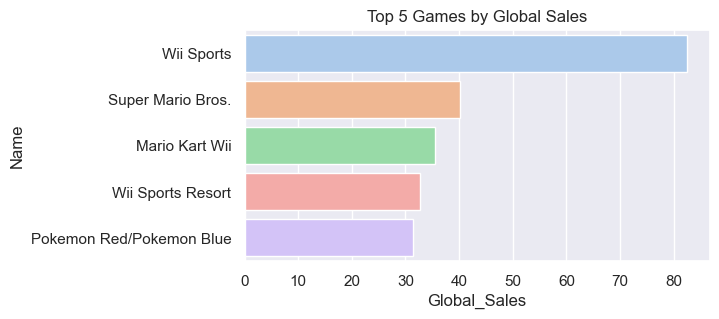

In [21]:
plt.figure(figsize=(6, 3))
sns.barplot(data= top_5_games_sold, x='Global_Sales', y='Name', palette='pastel')
plt.title('Top 5 Games by Global Sales')
plt.show()

### Question 2: Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?   

In [22]:
# Creating dataframe for the year between 2010 - 2014

sales_2010_2014 = df_sales[(df_sales['Year_of_Release'] >= 2010) & (df_sales['Year_of_Release'] <= 2014)]

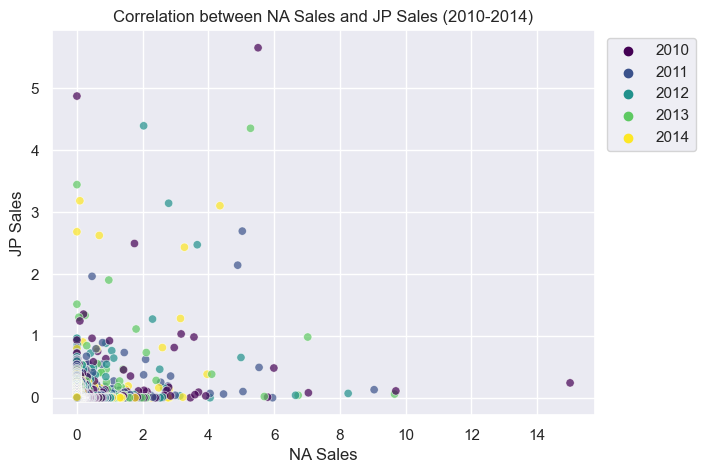

In [23]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=sales_2010_2014, x='NA_Sales', y='JP_Sales',hue='Year_of_Release', palette='viridis', alpha=0.7);
plt.legend(loc='upper right', bbox_to_anchor=(1.2,1));
plt.xlabel('NA Sales')
plt.ylabel('JP Sales')
plt.title('Correlation between NA Sales and JP Sales (2010-2014)')
plt.show();

### Question 3: What is the distribution of the most popular 4 game genres?  

In [24]:
# Creating DataFrame for the top 4 genres

top_4_genres = df_sales['Genre'].value_counts().nlargest(4)

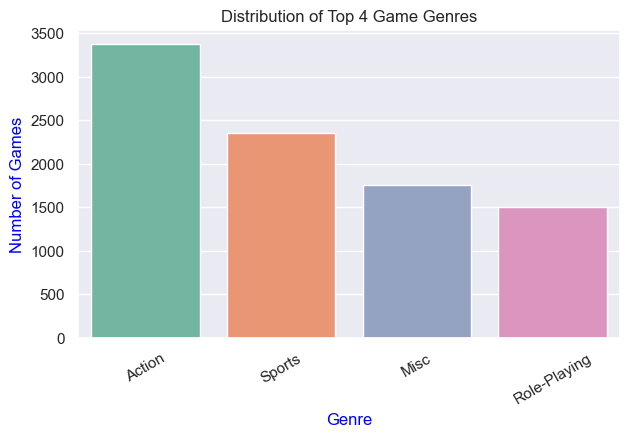

In [73]:
plt.figure(figsize=(7, 4))
sns.barplot(x=top_4_genres.index, y=top_4_genres.values, palette = 'Set2');
plt.xlabel('Genre', fontsize=12, color="blue")
plt.ylabel('Number of Games', fontsize=12, color="blue")
plt.title('Distribution of Top 4 Game Genres')
plt.xticks(rotation= 30)
plt.show();

### Question 4: Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  

In [48]:
# Creating dataframe to group the year for clear visualization
df_sales['year_group'] = 'Older (<=2005)'
df_sales.loc[df_sales['Year_of_Release'] > 2005, 'year_group'] = 'Newer (>2005)'

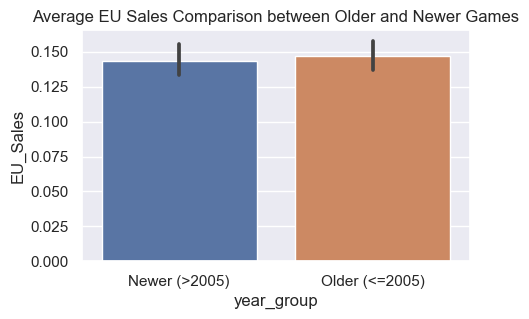

In [52]:
plt.figure(figsize=(5,3))
sns.barplot(data=df_sales, x='year_group', y='EU_Sales',  estimator=mean);
plt.title('Average EU Sales Comparison between Older and Newer Games');

### Question 5: What are the 3 most common “developer” in the dataset?  

In [56]:
# Calculating and creating DataFrame for the value count for Developers

top_3_developer= df_sales['Developer'].value_counts().head(3)

top_3_developer

Ubisoft      6827
EA Sports     172
EA Canada     167
Name: Developer, dtype: int64

In [57]:
top_3_developer.index

Index(['Ubisoft', 'EA Sports', 'EA Canada'], dtype='object')

In [61]:
top_3_developer.values

array([6827,  172,  167], dtype=int64)

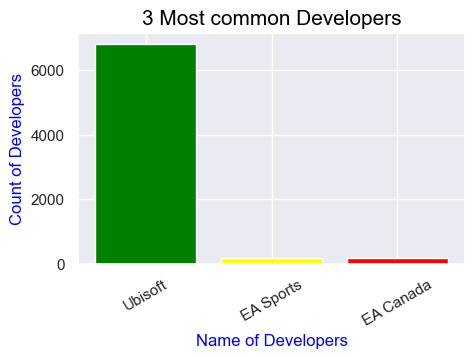

In [71]:
plt.figure(figsize=(5,3))
plt.bar(x=top_3_developer.index, height=top_3_developer.values,color=['green','yellow','red'])
plt.xticks(rotation= 30)
plt.xlabel("Name of Developers", fontsize=12, color="blue")
plt.ylabel("Count of Developers", fontsize=12, color="blue")
plt.title("3 Most common Developers", fontsize=15, color="black")
plt.show()

## Part 2: Does the critic score have a significant impact on global sales compared to user score?

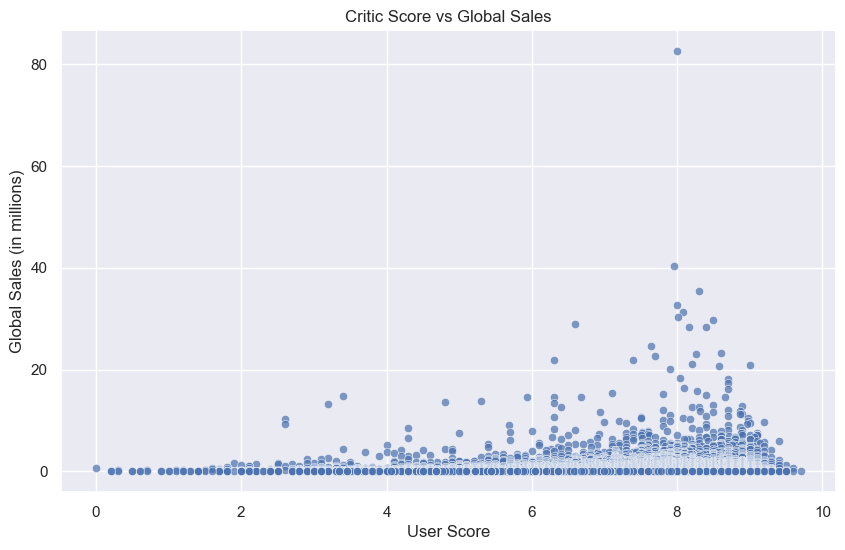

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sales, x='User_Score', y='Global_Sales', palette='viridis', alpha=0.7);
plt.xlabel('User Score')
plt.ylabel('Global Sales (in millions)')
plt.title('Critic Score vs Global Sales')
plt.grid(True)
plt.show()

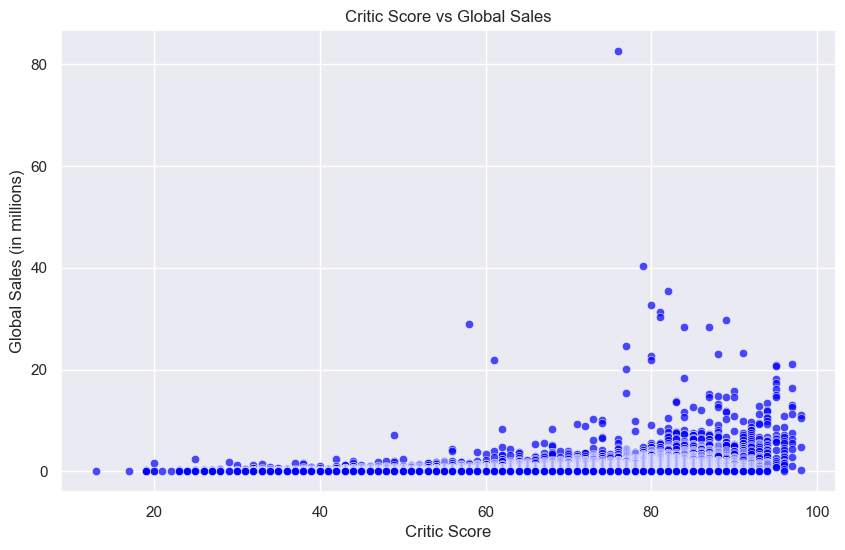

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sales, x='Critic_Score', y='Global_Sales', color='blue', alpha=0.7);
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (in millions)')
plt.title('Critic Score vs Global Sales')
plt.grid(True)
plt.show()